<a href="https://colab.research.google.com/github/ds-fau-ck/POC_CNN/blob/main/POC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
ROOT="/content/drive/MyDrive/CV"
os.chdir(ROOT)

In [48]:
car_img_path="car1.jpeg"

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [50]:
def read_img(path,grayscale=True):
  img=cv2.imread(path)
  if grayscale:
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  return img

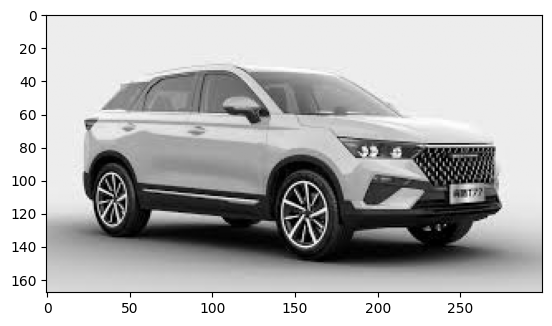

In [86]:
car=read_img(car_img_path)

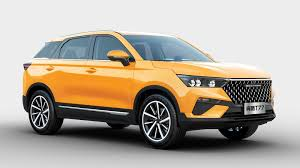

In [87]:
color_car=read_img(car_img_path, grayscale=False)

In [69]:
car.shape

(168, 300)

In [54]:
color_car.shape

(168, 300, 3)

In [77]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 166, 298, 1)    │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=car.shape)]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

In [75]:
#Shape should be (1,row,col,1)
row,col=car.shape
car=car.reshape(1, row,col,1)#grayscale
#car=car.reshape(1, row,col,3)#color
car.shape

(1, 168, 300, 1)

In [76]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=car.shape)]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 1) and input of shape (None, 1, 168, 300, 1).

In [73]:
row, col = car.shape
car = car.reshape(1, row, col, 1)   # (1, 168, 300, 1)

conv_layer = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=(row, col, 1)       # no batch dim
)


ValueError: too many values to unpack (expected 2)

In [66]:
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 1) and input of shape (None, 1, 168, 300, 1).

In [78]:
out=conv_model.predict(car)
out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


(1, 166, 298, 1)

TypeError: Invalid shape (1, 166, 298, 1) for image data

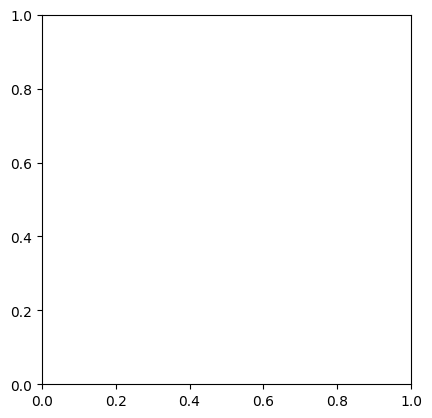

In [79]:
plt.imshow(out, cmap="gray")

In [82]:
row,col=out.shape[1:-1]# start first index and leaving last index
reshape_out=out.reshape(row,col)
reshape_out.shape

(166, 298)

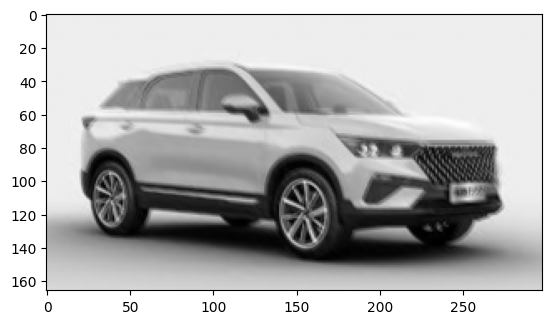

In [83]:
plt.imshow(reshape_out, cmap="gray")

In [88]:
row,col, depth=color_car.shape
color_car=color_car.reshape(1, row,col,depth)
color_car.shape

(1, 168, 300, 3)

In [89]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 166, 298, 1)    │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=5,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 166, 298, 5)    │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col=img.shape
    img=img.reshape(1,row,col,1)
    return img

  row, col,depth=img.shape
  color_img=img.reshape(1,row,col,depth)
  return color_img
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None):
  CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                     kernel_size=filter_size,
                                     strides=strides,
                                     input_shape=input_shape)]
  conv_model=tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out=conv_model.predict(img)
    print(out.shape)
    row,col,depth=out.shape[1:]
    reshape_out=out.reshape(row,col)
    plt.imshow(reshape_out, cmap="gray")
  except Exception as e:
    raise e
def apply_conv_model_and_visualize_five(img, conv_model):
  try:
    out=conv_model.predict(img)
    print(out.shape)
    row,col,depth=out.shape[1:]
    reshape_out=out.reshape(row,col,depth)
    fig, ax=plt.subplots(1,depth, figsize=(10,10))
    for d in range(depth):
      ax[d].imshow(reshape_out[:,:,d])
    #ax[1].imshow(reshape_out[:,:,1])
    #ax[2].imshow(reshape_out[:,:,2])
    #ax[3].imshow(reshape_out[:,:,3])
    #ax[4].imshow(reshape_out[:,:,4])
    #plt.imshow(reshape_out, cmap="gray")
  except Exception as e:
    raise e

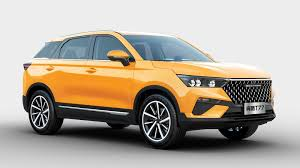

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 166, 298, 1)    │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
(1, 166, 298, 1)


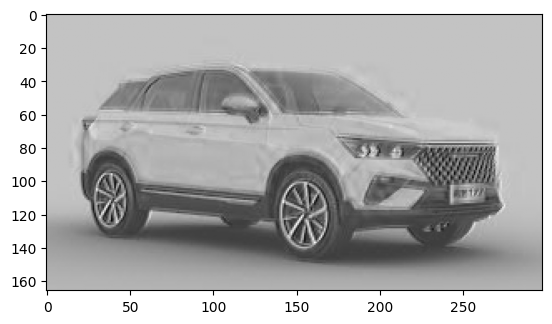

In [102]:
img=read_img(car_img_path, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)


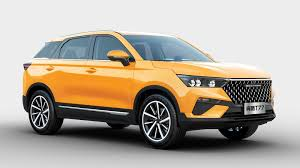

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 166, 298, 5)    │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(1, 166, 298, 5)


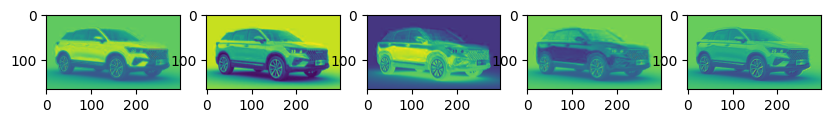

In [105]:
img=read_img(car_img_path, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=5, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize_five(input_img, model)